# K Means

### Importing Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

### Reading the dataset

In [3]:
dataset = pd.read_csv('C:/Users/hassa/OneDrive/Desktop/VI sem/ML/lab-external/dataset/Logistic_Iris.csv')

### Defining x 

In [13]:
x = dataset.iloc[:,[0,1,2,3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

C:\Users\hassa\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


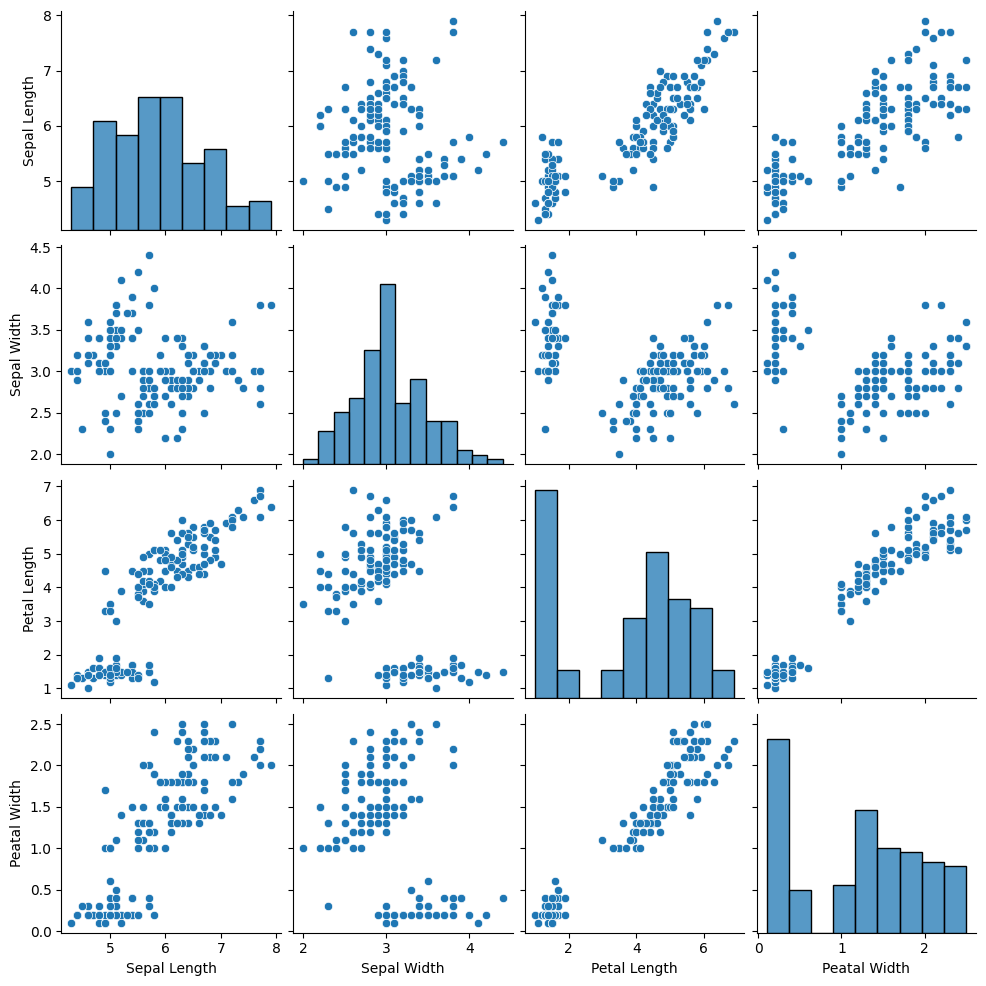

In [14]:
sns.pairplot(dataset)

### Finding optimum number of clusters for k-means classification

In [15]:
Elbow = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    Elbow.append(kmeans.inertia_)


### Plotting the results onto a line graph so as to observe 'The Elbow'

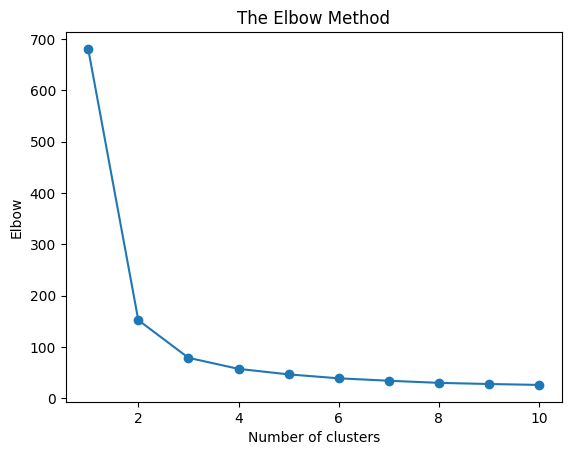

In [16]:
plt.plot(range(1,11), Elbow, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Elbow')
plt.show()

### Initializing KMeans Clustering Model 
Since we got the optimal number of clusters to be 3 from the figure

In [17]:
kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [18]:
y_kmeans = kmeans.fit_predict(x)

In [26]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### Visualizing the clusters

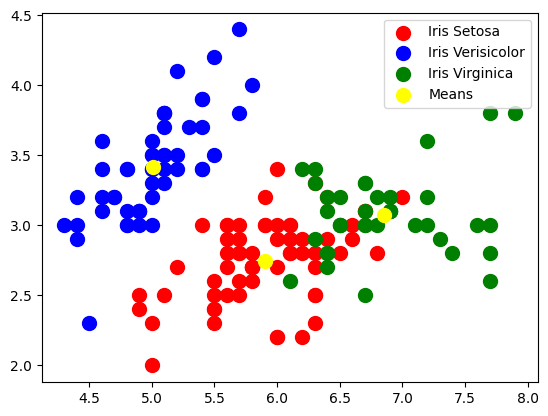

In [19]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,1], s = 100, c='red', label = 'Iris Setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Iris Verisicolor')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans == 2,1], s = 100, c = 'green', label = 'Iris Virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Means')
plt.legend()

### Creating a Distance Matrix

In [24]:
distance_matrix = linkage(x, method = 'ward', metric = 'euclidean')


### Create a dendrogram

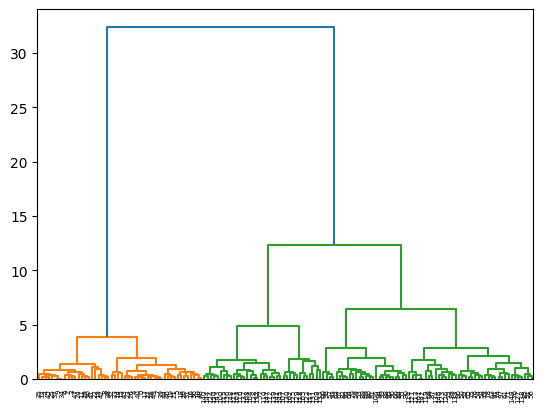

In [25]:
dn = dendrogram(distance_matrix)
plt.show()